Number of times null hypothesis is rejected: 482 out of 500 simulations
Type 1 Error: 0.964
Bias for Coefficient of Treatment : 0.048721301818719476
MSE for Coefficient of Treatment : 0.0005309724355912565
RMSE for Coefficient of Treatment : 0.023042839139117744
Average Standard Error: 0.009093368825213118
Standard Error of the beta_1 distribution: 0.016561984348393566
The confidence interval is (0.016259812495868088, {0.08118279114157087})


c:\Users\Biswajit Palit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


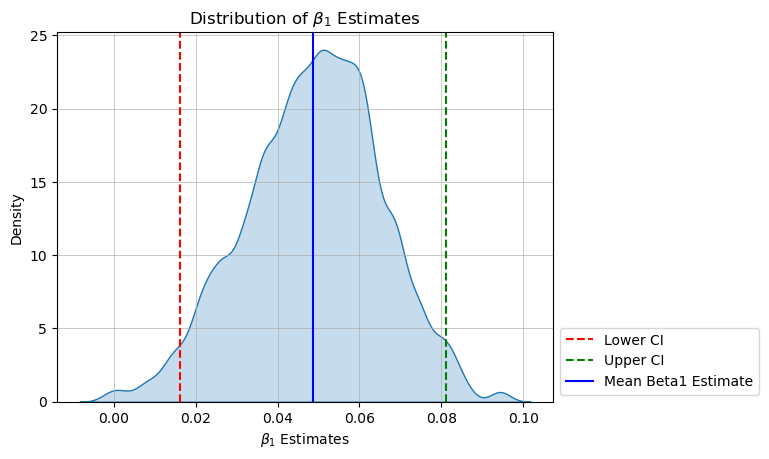

In [2]:
file_path = r'C:\\Users\\Biswajit Palit\\Downloads\\cps_00006.csv.gz'

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from cps_data_prep_power import cps_data

alpha = 0.05  # Significance level
num_simulations = 500

np.random.seed(42)

reject_count = 0  # Counter for the number of rejections
true_beta1_value = 0.05   # Initialising the counters
bias_values = []
squared_error_values = []
standard_error_values =[]
beta1_estimates = []


df = cps_data(file_path = file_path)

for _ in range(num_simulations):

   data = df.copy()
   
   states = data['STATEFIP'].unique()
   
   # Randomly selecting  half of the states to be in the treatment group
   
   treatment_states = np.random.choice(states, size=len(states)//2, replace=False)

   # Assigning treatment year to each treatment state, staggered between 1985 and 1995

   treatment_years = np.random.choice(range(1985, 1995), size=len(treatment_states), replace=True)
   state_to_treatment_year = dict(zip(treatment_states, treatment_years))

   # Adding a treatment column to the DataFrame

   data['TREATMENT'] = data.apply(lambda x: 1 if x['STATEFIP'] in treatment_states and x['YEAR'] >= state_to_treatment_year[x['STATEFIP']] else 0, axis=1)

   data['outcome'] = data.apply(lambda x: x['INCWAGE']*(1.05) if x['TREATMENT'] == 1 else x['INCWAGE'], axis=1)

   data['outcome'] = np.log(data['outcome'])

   # Data aggregation is being done after the 2% effect has been introduced

   X = data[['High School', "Master's Degree", 'AGE']]
   y = data['outcome']

   X = sm.add_constant(X)

   model = sm.OLS(y, X).fit()

   y_pred = model.predict(X)   # Obtain predicted values from the fitted model

   residuals = y - y_pred

   data['Residuals'] = residuals

   cps_agg = data.groupby(['STATEFIP', 'YEAR'])[['Residuals', 'TREATMENT']].mean().reset_index()

   dummy_df_state = pd.get_dummies(cps_agg['STATEFIP'], prefix='STATEFIP', drop_first=True)  # One-hot encode STATEFIP and YEAR
   dummy_df_year = pd.get_dummies(cps_agg['YEAR'], prefix='YEAR', drop_first=True)

   
   cps_agg = pd.concat([cps_agg, dummy_df_state, dummy_df_year], axis=1)

   
   boolean_columns = ['STATEFIP_2', 'STATEFIP_4', 'STATEFIP_5', 'STATEFIP_6', 'STATEFIP_8', 'STATEFIP_9',   
                     'STATEFIP_10', 'STATEFIP_12', 'STATEFIP_13', 'STATEFIP_15', 'STATEFIP_16', 'STATEFIP_17',
                     'STATEFIP_18', 'STATEFIP_19', 'STATEFIP_20', 'STATEFIP_21', 'STATEFIP_22', 'STATEFIP_23',
                     'STATEFIP_24', 'STATEFIP_25', 'STATEFIP_26', 'STATEFIP_27', 'STATEFIP_28', 'STATEFIP_29',
                     'STATEFIP_30', 'STATEFIP_31', 'STATEFIP_32', 'STATEFIP_33', 'STATEFIP_34', 'STATEFIP_35',
                     'STATEFIP_36', 'STATEFIP_37', 'STATEFIP_38', 'STATEFIP_39', 'STATEFIP_40', 'STATEFIP_41',
                     'STATEFIP_42', 'STATEFIP_44', 'STATEFIP_45', 'STATEFIP_46', 'STATEFIP_47', 'STATEFIP_48',
                     'STATEFIP_49', 'STATEFIP_50', 'STATEFIP_51', 'STATEFIP_53', 'STATEFIP_54', 'STATEFIP_55',
                     'STATEFIP_56', 'YEAR_1981', 'YEAR_1982', 'YEAR_1983', 'YEAR_1984', 'YEAR_1985', 'YEAR_1986',
                     'YEAR_1987', 'YEAR_1988', 'YEAR_1989', 'YEAR_1990', 'YEAR_1991', 'YEAR_1992', 'YEAR_1993',
                     'YEAR_1994', 'YEAR_1995', 'YEAR_1996', 'YEAR_1997', 'YEAR_1998', 'YEAR_1999', 'YEAR_2000']   # Convert True and False to 1 and 0 in the specified columns

   cps_agg[boolean_columns] = cps_agg[boolean_columns].astype(int)

   data = cps_agg.copy()

   X = data[['STATEFIP_2', 'STATEFIP_4', 'TREATMENT',
      'STATEFIP_5', 'STATEFIP_6', 'STATEFIP_8', 'STATEFIP_9', 'STATEFIP_10',
      'STATEFIP_12', 'STATEFIP_13', 'STATEFIP_15', 'STATEFIP_16',
      'STATEFIP_17', 'STATEFIP_18', 'STATEFIP_19', 'STATEFIP_20',
      'STATEFIP_21', 'STATEFIP_22', 'STATEFIP_23', 'STATEFIP_24',
      'STATEFIP_25', 'STATEFIP_26', 'STATEFIP_27', 'STATEFIP_28',
      'STATEFIP_29', 'STATEFIP_30', 'STATEFIP_31', 'STATEFIP_32',
      'STATEFIP_33', 'STATEFIP_34', 'STATEFIP_35', 'STATEFIP_36',
      'STATEFIP_37', 'STATEFIP_38', 'STATEFIP_39', 'STATEFIP_40',
      'STATEFIP_41', 'STATEFIP_42', 'STATEFIP_44', 'STATEFIP_45',
      'STATEFIP_46', 'STATEFIP_47', 'STATEFIP_48', 'STATEFIP_49',
      'STATEFIP_50', 'STATEFIP_51', 'STATEFIP_53', 'STATEFIP_54',
      'STATEFIP_55', 'STATEFIP_56', 'YEAR_1981', 'YEAR_1982', 'YEAR_1983',
      'YEAR_1984', 'YEAR_1985', 'YEAR_1986', 'YEAR_1987', 'YEAR_1988',
      'YEAR_1989', 'YEAR_1990', 'YEAR_1991', 'YEAR_1992', 'YEAR_1993',
      'YEAR_1994', 'YEAR_1995', 'YEAR_1996', 'YEAR_1997', 'YEAR_1998',
      'YEAR_1999', 'YEAR_2000' ]] 
   X = sm.add_constant(X)
   Y = data['Residuals'] 
   model = sm.OLS(Y, X).fit()

   bias_value = model.params['TREATMENT'] - true_beta1_value
   
   bias_values.append(bias_value)

   squared_error = (model.params['TREATMENT'] - true_beta1_value) ** 2

   
   standard_error = model.bse['TREATMENT']
   standard_error_values.append(standard_error)
   beta1_estimates.append(model.params['TREATMENT'])
   
   
   # Checking if null hypothesis for beta1 is rejected

   if model.pvalues['TREATMENT'] < alpha :
      reject_count += 1


type1_error = reject_count / num_simulations

bias = np.mean(bias_values)
mse = np.mean(squared_error)   
rmse = np.sqrt(mse)  
average_standard_error = np.mean(standard_error_values)   
std_error_beta_distribution = np.std(beta1_estimates)

confidence_interval = (
    np.mean(beta1_estimates) - 1.96 * std_error_beta_distribution,
    np.mean(beta1_estimates) + 1.96 * std_error_beta_distribution
)


print(f"Number of times null hypothesis is rejected: {reject_count} out of {num_simulations} simulations")
print(f"Type 1 Error: {type1_error}")
print(f"Bias for Coefficient of Treatment : {bias}")
print(f"MSE for Coefficient of Treatment : {mse}")
print(f"RMSE for Coefficient of Treatment : {rmse}")
print(f"Average Standard Error: {average_standard_error}")
print(f"Standard Error of the beta_1 distribution: {std_error_beta_distribution}")
print(f'The confidence interval is {confidence_interval[0] , {confidence_interval[1]}}')

sns.kdeplot(beta1_estimates, bw_adjust=0.5, fill=True)
plt.xlabel(r'$\beta_1$ Estimates')  # Using LaTeX for beta_1
plt.ylabel('Density')
plt.title(r'Distribution of $\beta_1$ Estimates')


mean_beta1_estimate = np.mean(beta1_estimates) # Calculating mean of beta1 estimates for marking on plot

# Adding vertical lines for the confidence interval and the mean beta1 estimate

plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='Lower CI')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label='Upper CI')
plt.axvline(x=mean_beta1_estimate, color='blue', linestyle='-', label='Mean Beta1 Estimate')

plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.show()

